In [4]:
import logging
import os

logger = logging.getLogger('experiment')

import itertools
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from cnpy import utils
import ast
import mysql.connector
import time
import random

results_dict = {}
std_dict = {}
all_experiments = []
folders = []
all_experiments = {}
legend = []
colors = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))

In [5]:
with open("credentials.json") as f:
        db_data = json.load(f)

In [6]:
def run_query(database, query):
    db_name = database
    query = query
    conn = mysql.connector.connect(
    host=db_data['database'][0]["ip"],
    user=db_data['database'][0]["username"],
    password=db_data['database'][0]["password"])
  
    sql_run = conn.cursor()
    sql_run.execute("USE " + db_name+ ";")
    
    output = sql_run.execute(query)
    output = sql_run.fetchall()
    return output

def plot(query, plt, title):
    output = run_query(db_name, query)
    results_dict = {}
    x = []
    y = []
    
    err = []
    flag = True

    for d in output:
#         print(d) # d: (stepsize, mean_err, error_bar)
        if d[1] is not None and d[1] < 10000:
            x.append(d[0])
            y.append(d[1])
            err.append(d[2])

    if flag:
        plt.errorbar(x, y, err, label=title)
    return plt

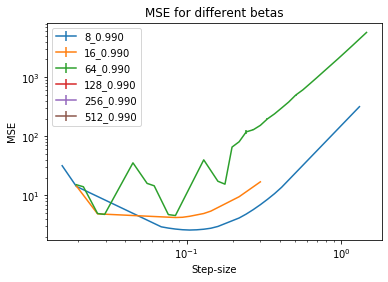

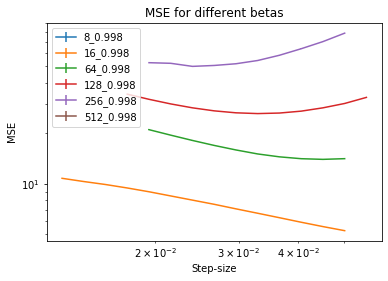

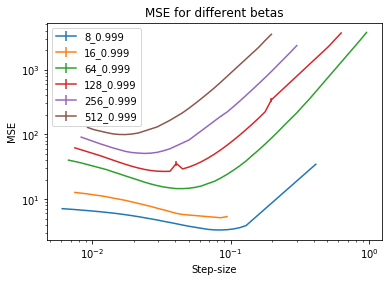

In [25]:
db_name = "yuxin_experiments_5_0_1"
# varying betas for rmsprop

features = ["8", "16", "64", "128", "256", "512"]
betas =  ["0.990", "0.998","0.999"]
inputs = ["0"]
standard = ["1"]


for beta in betas:
    for dist in features:
        query = "select step_size, AVG(mean_sum_of_errors), std(mean_sum_of_errors)/sqrt(count(mean_sum_of_errors)) from error_table JOIN runs r on error_table.run = r.run where beta=%s and epsilon=1.0e-8 and features=%s and input_mean = 0 and input_std = 1 and target_mean = 0 and target_std = 1 and mean_sum_of_errors is not null group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std order by features, step_size;" %(beta, dist)
        plot(query, plt, dist + "_" + beta)
        
    plt.xlabel('Step-size')
    plt.ylabel("MSE")


    plt.yscale("log")
    # plt.ylim(0.1, 3000)
    plt.xscale("log")
    # plt.xlim(1e-2, 1)
    plt.legend()
    plt.title("MSE for different betas")
    # plt.savefig("exp_1_role_of_features.pdf", format="pdf")
    plt.show()

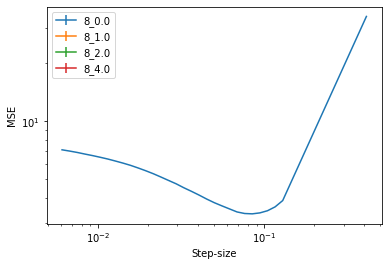

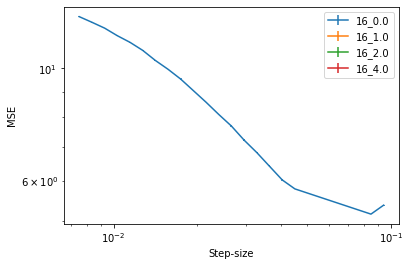

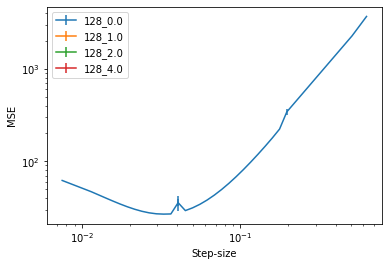

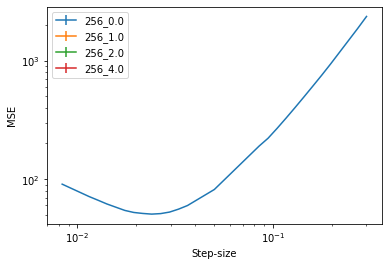

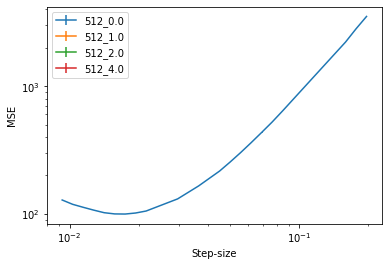

In [30]:
db_name = "yuxin_experiments_5_0_1"
# varying input_mean for rmsprop

features = ["8", "16", "128", "256", "512"]
input_mean = ["0.0", "1.0", "2.0", "4.0"]
input_stds = ["1"]
target_means = ["0.0"]
target_stds = ["1"]


for dist in features:
    for input_m in input_mean:
        for input_std in input_stds:
            for target_m in target_means:
                for target_std in target_stds:
                    query = """select step_size, AVG(mean_sum_of_errors), std(mean_sum_of_errors)/sqrt(count(mean_sum_of_errors)) 
            from error_table JOIN runs r on error_table.run = r.run 
            where features=%s and input_mean = %s and input_std=%s and target_mean=%s and target_std= %s and beta=0.999 and epsilon=1.0e-8 and mean_sum_of_errors is not null 
            group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std, beta, epsilon 
            order by features, step_size;"""%(dist, input_m, input_std, target_m, target_std)
                    plot(query, plt, dist + "_" + input_m)
       
    plt.xlabel('Step-size')
    plt.ylabel("MSE")


    plt.yscale("log")
    # plt.ylim(0.1, 3000)
    plt.xscale("log")
    plt.legend()
    # plt.title("Asymptotic error for different input distributions")
    # plt.savefig("exp_1_role_of_features.pdf", format="pdf")
    plt.show()

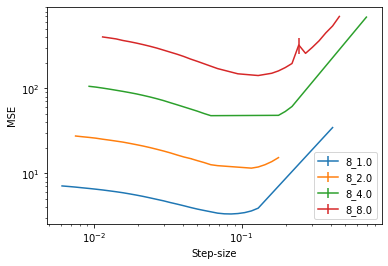

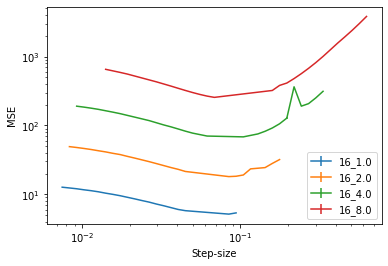

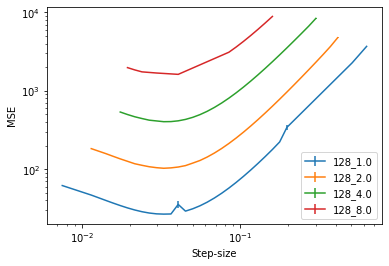

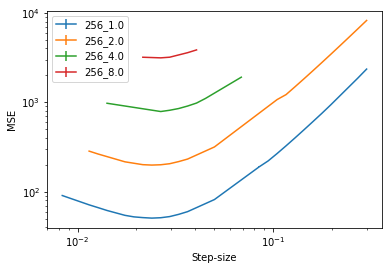

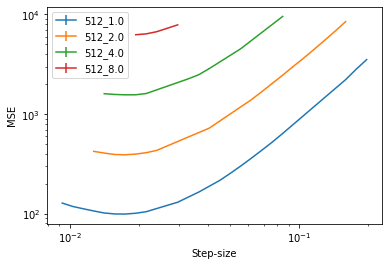

In [27]:
db_name = "yuxin_experiments_5_0_1"
# varying input_standard for rmsprop

features = ["8", "16", "128", "256", "512"]
input_mean = ["0.0"]
input_stds = ["1.0", "2.0", "4.0", "8.0"]
target_means = ["0.0"]
target_stds = ["1"]


for dist in features:
    for input_m in input_mean:
        for input_std in input_stds:
            for target_m in target_means:
                for target_std in target_stds:
                    query = """select step_size, AVG(mean_sum_of_errors), std(mean_sum_of_errors)/sqrt(count(mean_sum_of_errors)) 
            from error_table JOIN runs r on error_table.run = r.run 
            where features=%s and input_mean = %s and input_std=%s and target_mean=%s and target_std= %s and beta=0.999 and epsilon=1.0e-8 and mean_sum_of_errors is not null 
            group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std 
            order by features, step_size;"""%(dist, input_m, input_std, target_m, target_std)
                    plot(query, plt, dist + "_" + input_std)
       
    plt.xlabel('Step-size')
    plt.ylabel("MSE")


    plt.yscale("log")
    # plt.ylim(0.1, 3000)
    plt.xscale("log")
    plt.legend()
    # plt.title("Asymptotic error for different input distributions")
    # plt.savefig("exp_1_role_of_features.pdf", format="pdf")
    plt.show()

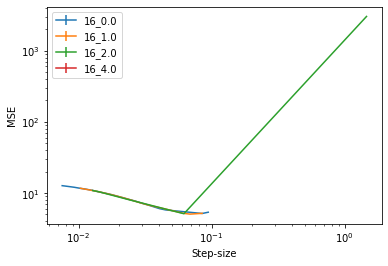

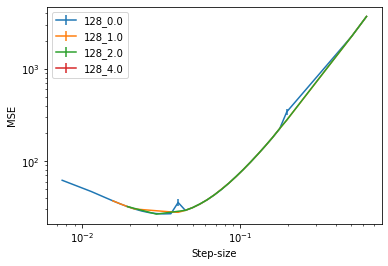

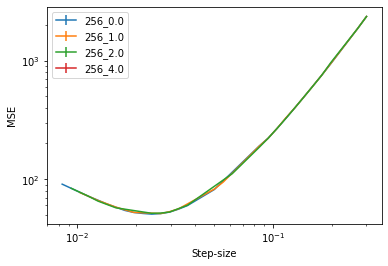

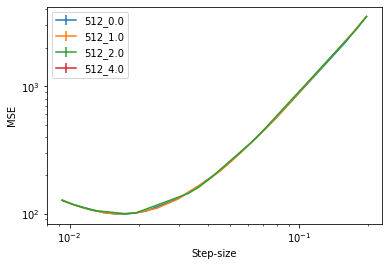

In [29]:
db_name = "yuxin_experiments_5_0_1"
# varying target mean for rmsprop

features = ["16", "128", "256", "512"]
input_mean = ["0"]
input_stds = ["1"]
target_means = ["0.0", "1.0", "2.0", "4.0"]
target_stds = ["1"]


for dist in features:
    for input_m in input_mean:
        for input_std in input_stds:
            for target_m in target_means:
                for target_std in target_stds:
                    query = """select step_size, AVG(mean_sum_of_errors), std(mean_sum_of_errors)/sqrt(count(mean_sum_of_errors)) 
            from error_table JOIN runs r on error_table.run = r.run 
            where features=%s and input_mean = %s and input_std=%s and target_mean=%s and target_std= %s and beta=0.999 and epsilon=1.0e-8 and mean_sum_of_errors is not null 
            group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std 
            order by features, step_size;"""%(dist, input_m, input_std, target_m, target_std)
                    plot(query, plt, dist + "_" + target_m)
        
    plt.xlabel('Step-size')
    plt.ylabel("MSE")
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    # plt.title("Asymptotic error for different input distributions")
    # plt.savefig("exp_1_role_of_features.pdf", format="pdf")
    plt.show()

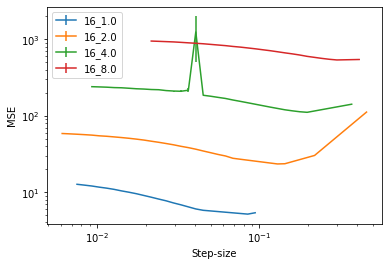

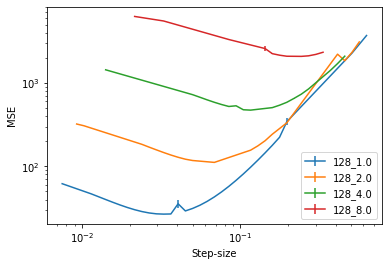

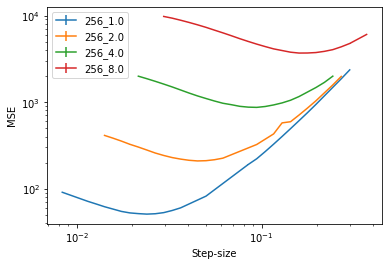

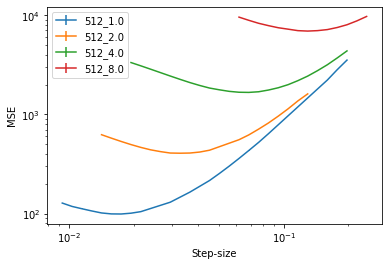

In [14]:
db_name = "yuxin_experiments_5_0_1"
# varying target std for rmsprop

features = ["16", "128", "256", "512"]
input_mean = ["0.0"]
input_stds = ["1"]
target_means = ["0.0"]
target_stds = ["1.0", "2.0", "4.0", "8.0"]


for dist in features:
    for input_m in input_mean:
        for input_std in input_stds:
            for target_m in target_means:
                for target_std in target_stds:
                    query = """select step_size, AVG(mean_sum_of_errors), std(mean_sum_of_errors)/sqrt(count(mean_sum_of_errors)) 
            from error_table JOIN runs r on error_table.run = r.run 
            where features=%s and input_mean = %s and input_std=%s and target_mean=%s and target_std= %s and beta=0.999 and epsilon=1.0e-8 and mean_sum_of_errors is not null 
            group by algorithm, features, step_size, target_noise, input_mean, input_std, target_mean, target_std 
            order by features, step_size;"""%(dist, input_m, input_std, target_m, target_std)
                    plot(query, plt, dist + "_" + target_std)
       
    plt.xlabel('Step-size')
    plt.ylabel("MSE")


    plt.yscale("log")
    # plt.ylim(0.1, 3000)
    plt.xscale("log")
    plt.legend()
    # plt.title("Asymptotic error for different input distributions")
    # plt.savefig("exp_1_role_of_features.pdf", format="pdf")
    plt.show()